In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import timedelta

/usr/lib/python3/dist-packages/matplotlib/__init__.py:874: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [8]:
def Plotbox(mdtf1,mcolum,morder):
    plt.rcParams['figure.dpi'] = 140
    sns.boxplot(x='test', y=mcolum, data=mdtf1, order=morder)
    ax = plt.gca()
    ax.grid(True)
    plt.show()
    
def Append(mdtf1,mdtf2,mdtf3,mdtf4,mdtf5,mdtf6,mdtf7):
    mdtf1 = mdtf1.append(mdtf2)
    mdtf1 = mdtf1.append(mdtf3)
    mdtf1 = mdtf1.append(mdtf4)
    mdtf1 = mdtf1.append(mdtf5)
    mdtf1 = mdtf1.append(mdtf6)
    return mdtf1.append(mdtf7)
    
def AppendAndPlot(df1,df2,df3,df4,df5,df6,df7,
                  O_column, simbol, value, morder):
    ndf = Append(df1, df2, df3, df4, df5, df6, df7).reset_index(drop=True)
    ndf[O_column] = CastOutLayers(ndf, O_column, simbol,value)
    Plotbox(ndf,O_column,morder)

def CastOutLayers(mdtf1, column, lowerorgreater,mlimit):
    aux = []
    for row in mdtf1[column]:
        if type(row) is str:
            row =row.replace(".", "")
        if lowerorgreater == "<":
            if float(row) > mlimit:
                aux.append(mlimit)
            else:
                aux.append(float(row))
        elif lowerorgreater == ">":
            if float(row) < mlimit:
                aux.append(mlimit)
            else:
                aux.append(float(row))
    return aux

In [9]:
def getDates3(dft):
    sal = pd.to_datetime(dft.Hora, format="%Y-%m-%d %H:%M:%S.%f")
    dft['latency in seconds'] = (sal-pd.to_datetime(dft.timestamp2, format="%Y-%m-%d %H:%M:%S.%f"))/ np.timedelta64(1, 's')
    return dft[['latency in seconds','test']]

In [10]:
dft25 = pd.read_csv('latencyRaspberry/25_8.csv')
dft25  ["test"]= "25"
lat25 = getDates3(dft25)

dft50 = pd.read_csv('latencyRaspberry/50_8.csv')
dft50  ["test"]= "50"
lat50 = getDates3(dft50)

dft75 = pd.read_csv('latencyRaspberry/75_8.csv')
dft75  ["test"]= "75"
lat75 = getDates3(dft75)

dft100 = pd.read_csv('latencyRaspberry/100_8.csv')
dft100  ["test"]= "100"
lat100 = getDates3(dft100)

dft125 = pd.read_csv('latencyRaspberry/125_8.csv')
dft125  ["test"]= "125"
lat125 = getDates3(dft125)

dft150 = pd.read_csv('latencyRaspberry/150_8.csv')
dft150  ["test"]= "150"
lat150 = getDates3(dft150)

dft175 = pd.read_csv('latencyRaspberry/175_8.csv')
dft175  ["test"]= "175"
lat175 = getDates3(dft175)

In [11]:
morder=["25", "50", "75", "100", "125", "150", "175"]

/usr/lib/python3/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


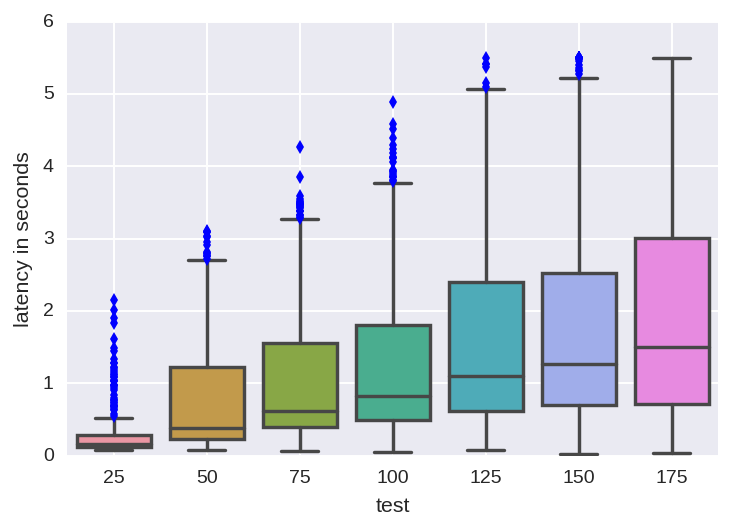

In [8]:
AppendAndPlot(lat25, lat50, lat75, lat100,
              lat125, lat150,lat175,"latency in seconds",
              "<",5.5,morder)

/usr/lib/python3/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


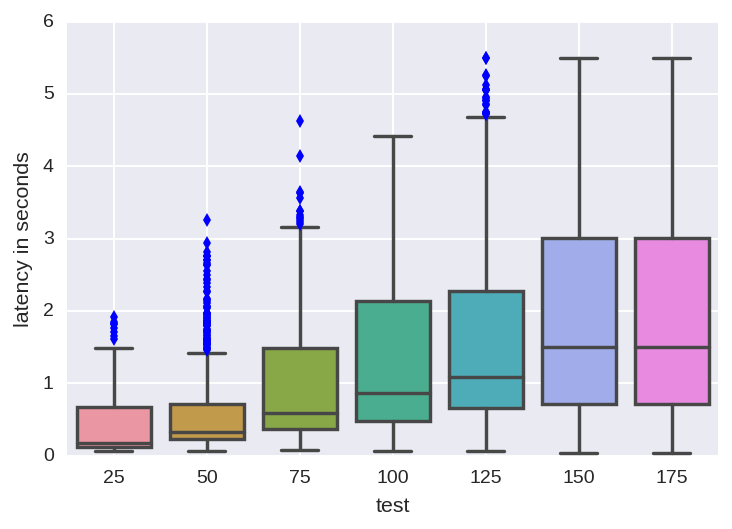

In [10]:
AppendAndPlot(lat25, lat50, lat75, lat100,
              lat125, lat150,lat175,"latency in seconds",
              "<",5.5,morder)

/usr/lib/python3/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


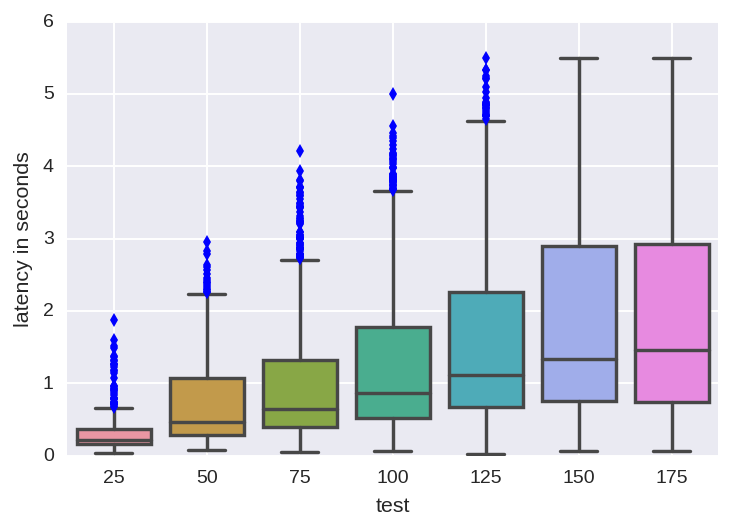

In [21]:
AppendAndPlot(lat25, lat50, lat75, lat100,
              lat125, lat150,lat175,"latency in seconds",
              "<",5.5,morder)

In [18]:
lat175['latency in seconds'].describe()

count    1500.000000
mean        1.898119
std         1.467052
min         0.059249
25%         0.753617
50%         1.331929
75%         2.895206
max         6.619215
Name: latency in seconds, dtype: float64

In [12]:
def CastOutLayers(mdtf1, column, lowerorgreater,mlimit):
    aux = []
    for row in mdtf1[column]:
        if type(row) is str:
            row =row.replace(".", "")
        if lowerorgreater == "<":
            if float(row) > mlimit:
                aux.append(mlimit)
            else:
                aux.append(float(row))
        elif lowerorgreater == ">":
            if float(row) < mlimit:
                aux.append(mlimit)
            else:
                aux.append(float(row))
    return aux

def CastAll(df1,df2,df3,df4,df5,df6,df7,N_column,lowerorgreater,mlimit):
    df1[N_column] = CastOutLayers(df1,N_column,lowerorgreater,mlimit)
    df2[N_column] = CastOutLayers(df2,N_column,lowerorgreater,mlimit)
    df3[N_column] = CastOutLayers(df3,N_column,lowerorgreater,mlimit)
    df4[N_column] = CastOutLayers(df4,N_column,lowerorgreater,mlimit)
    df5[N_column] = CastOutLayers(df5,N_column,lowerorgreater,mlimit)
    df6[N_column] = CastOutLayers(df6,N_column,lowerorgreater,mlimit)
    df7[N_column] = CastOutLayers(df7,N_column,lowerorgreater,mlimit)
    return df1,df2,df3,df4,df5,df6,df7

def CastAndPlot(df1,df2,df3,df4,df5,df6,df7,N_column,lowerorgreater,mlimit,morder):
    data = [df1[N_column].mean(),df2[N_column].mean(),df3[N_column].mean(),df4[N_column].mean(),df5[N_column].mean(),df6[N_column].mean(),df7[N_column].mean()]
    plt.rcParams['figure.dpi'] = 200
    plt.plot(morder,data)
    ax = plt.gca()
    ax.grid(True)
    ax.grid(color='black', linestyle='-', linewidth=0.05)
    ax.set_axis_bgcolor('white')
    plt.legend(N_column, loc='upper center')
    plt.xticks(np.arange(25, 200, step=25))
    plt.xlabel('Nº Alarmas')
    plt.ylabel(N_column)
    plt.savefig(N_column+'_O.eps', format='eps', dpi=1000)

In [13]:
def CastAndPlot1(df1,N_column):
    plt.rcParams['figure.dpi'] = 200
    plt.plot(df1[N_column])
    ax = plt.gca()
    ax.grid(True)
    ax.grid(color='black', linestyle='-', linewidth=0.05)
    ax.set_axis_bgcolor('white')
    plt.legend(N_column, loc='upper center')
    plt.xlabel('Nº Alarmas')
    plt.ylabel(N_column)
    plt.savefig(N_column+'_O.eps', format='eps', dpi=1000)

def CastAndPlot2(df1,df2,N_column,lowerorgreater,mlimit,morder):
    plt.rcParams['figure.dpi'] = 200
    plt.plot(morder,df1)
    plt.plot(morder,df2)
    ax = plt.gca()
    ax.grid(True)
    ax.grid(color='black', linestyle='-', linewidth=0.05)
    ax.set_axis_bgcolor('white')
    plt.legend(["raspberry","odroid"], loc='upper center')
    plt.xticks(np.arange(25, 200, step=25))
    plt.xlabel('Nº Alarmas')
    plt.ylabel(N_column)
    plt.savefig(N_column+'_O.eps', format='eps', dpi=1000)

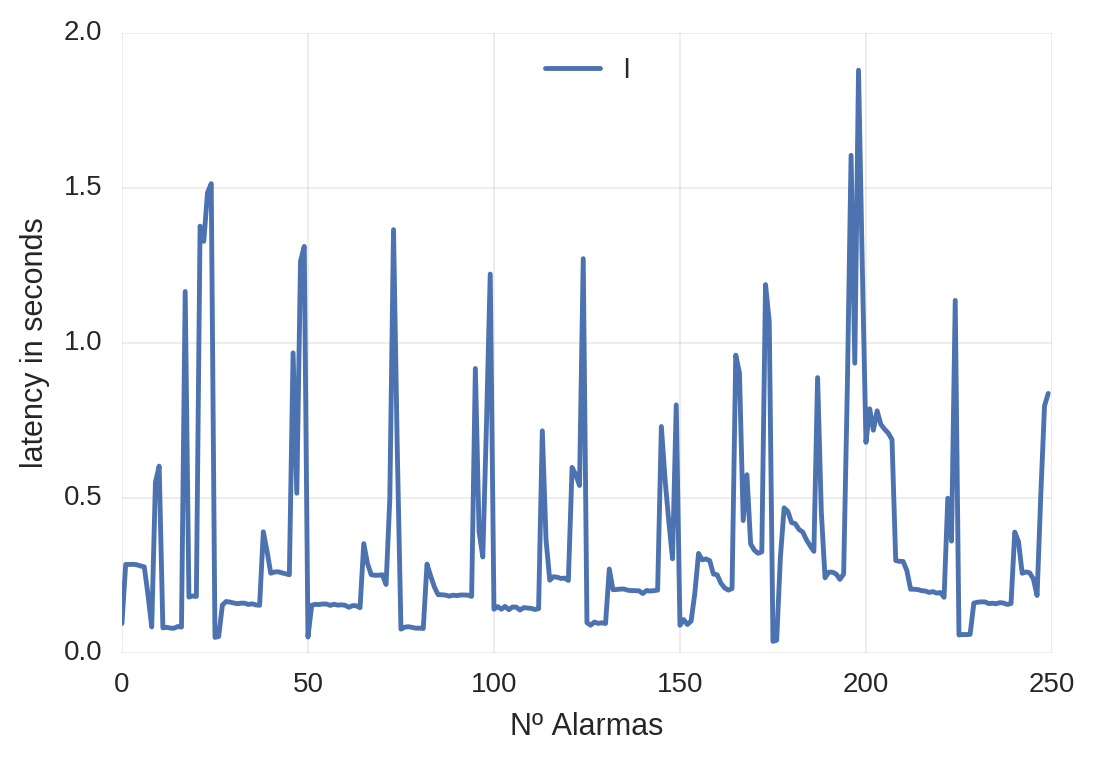

In [14]:
CastAndPlot1(lat25,"latency in seconds")

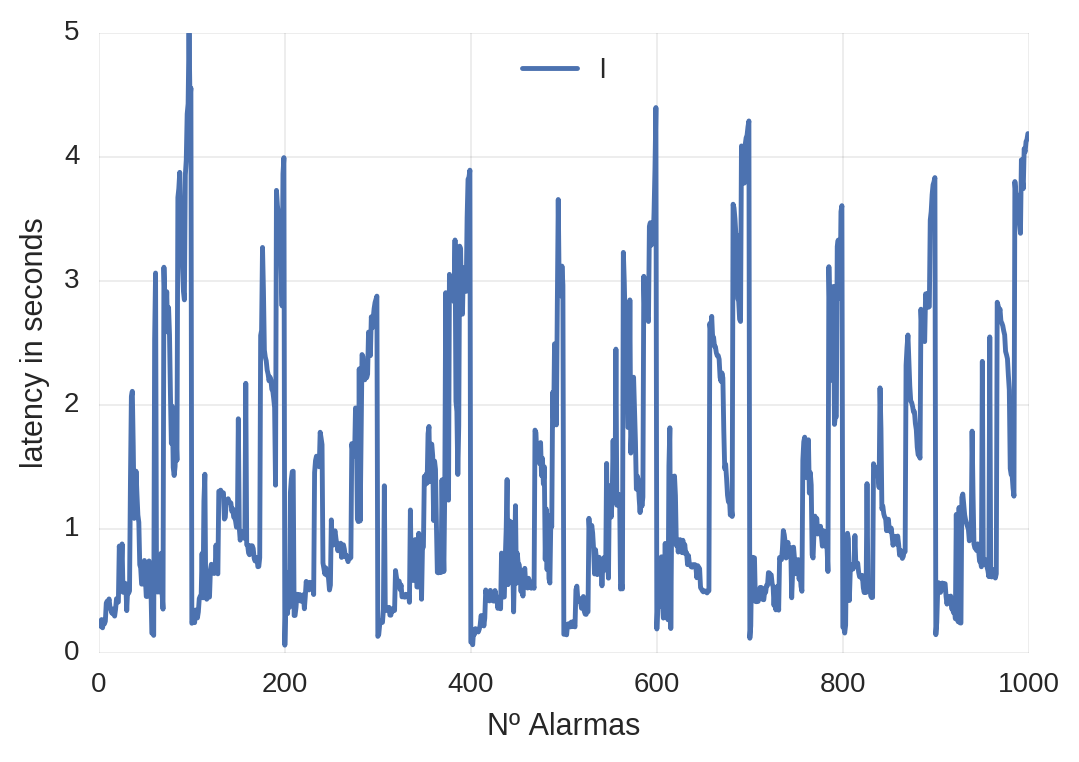

In [17]:
CastAndPlot1(lat100,"latency in seconds")

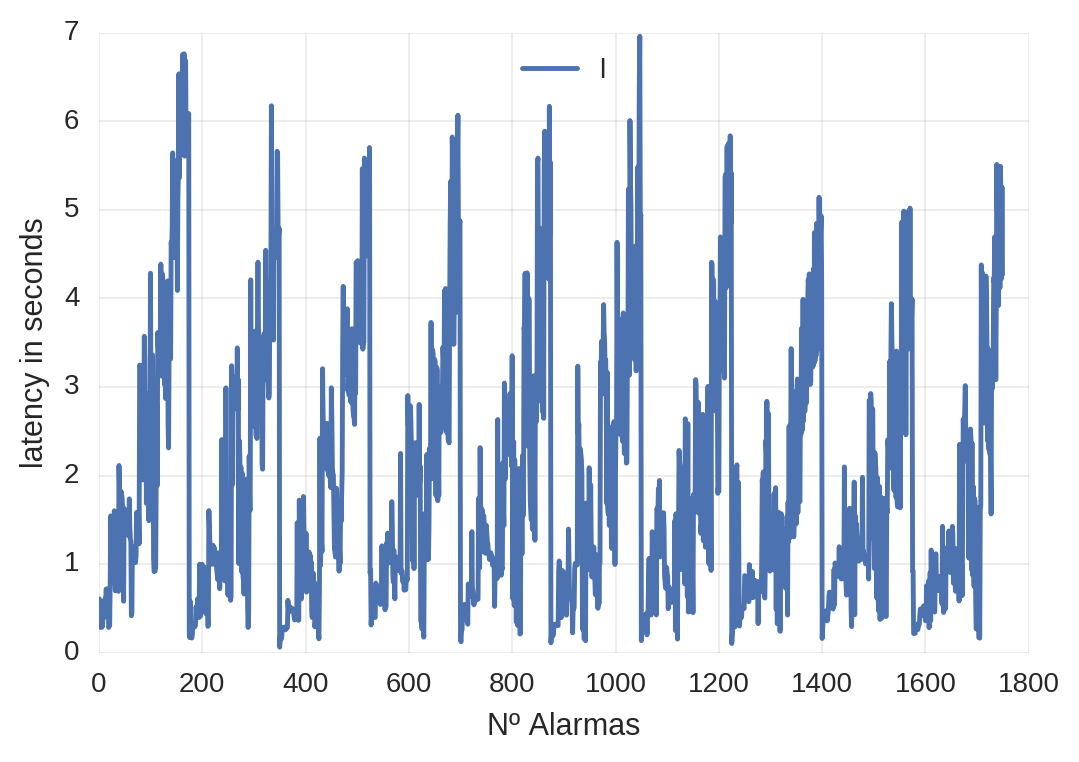

In [20]:
CastAndPlot1(lat175,"latency in seconds")

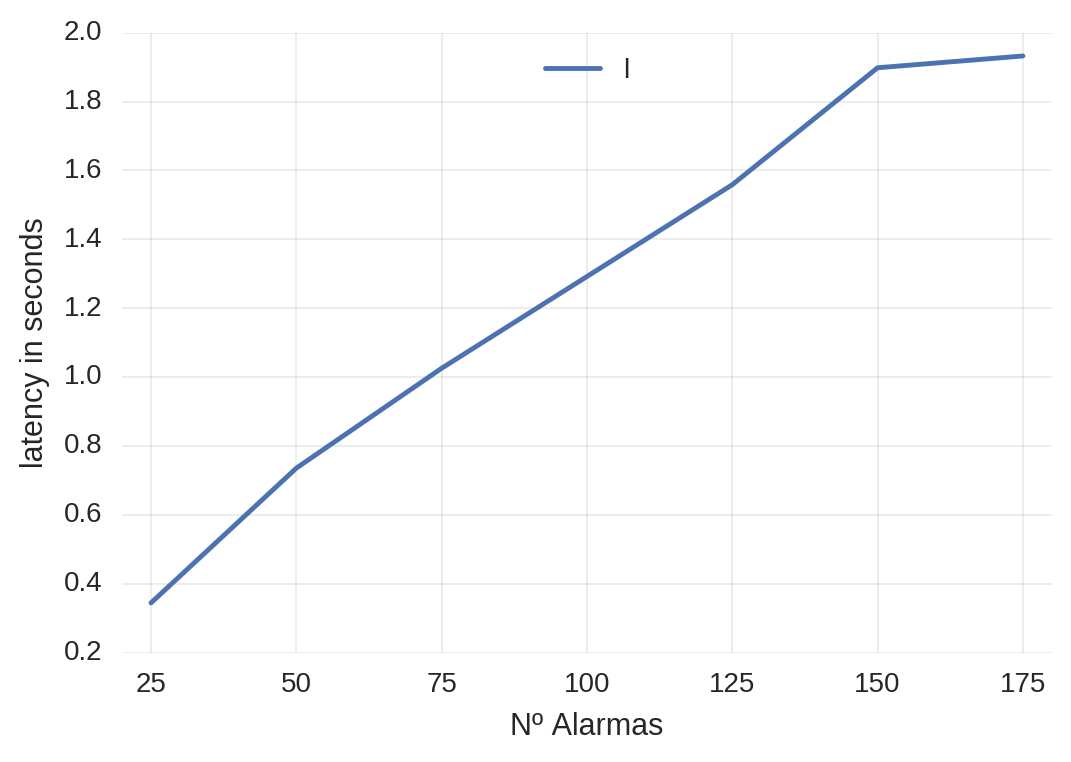

In [23]:
CastAndPlot(lat25, lat50, lat75, lat100,
              lat125, lat150,lat175,"latency in seconds",
              "<",10,morder)

In [21]:
dft25o = pd.read_csv('latencyOdroid/25_8.csv')
dft25o  ["test"]= "25"
lat25o = getDates3(dft25o)

dft50o = pd.read_csv('latencyOdroid/50_8.csv')
dft50o  ["test"]= "50"
lat50o = getDates3(dft50o)

dft75o = pd.read_csv('latencyOdroid/75_8.csv')
dft75o  ["test"]= "75"
lat75o = getDates3(dft75o)

dft100o = pd.read_csv('latencyOdroid/100_8.csv')
dft100o  ["test"]= "100"
lat100o = getDates3(dft100o)

dft125o = pd.read_csv('latencyOdroid/125_8.csv')
dft125o  ["test"]= "125"
lat125o = getDates3(dft125o)

dft150o = pd.read_csv('latencyOdroid/150_8.csv')
dft150o  ["test"]= "150"
lat150o = getDates3(dft150o)

dft175o = pd.read_csv('latencyOdroid/175_8.csv')
dft175o  ["test"]= "175"
lat175o = getDates3(dft175o)


In [26]:
def getMean(df1,df2,df3,df4,df5,df6,df7,N_column):
    return [df1[N_column].mean(),df2[N_column].mean(),df3[N_column].mean(),df4[N_column].mean(),df5[N_column].mean(),df6[N_column].mean(),df7[N_column].mean()]

In [30]:
lrasp = getMean(lat25, lat50, lat75, lat100,
              lat125, lat150,lat175,"latency in seconds")
lodroid = getMean(lat25o, lat50o, lat75o, lat100o,
              lat125o, lat150o,lat175o,"latency in seconds")

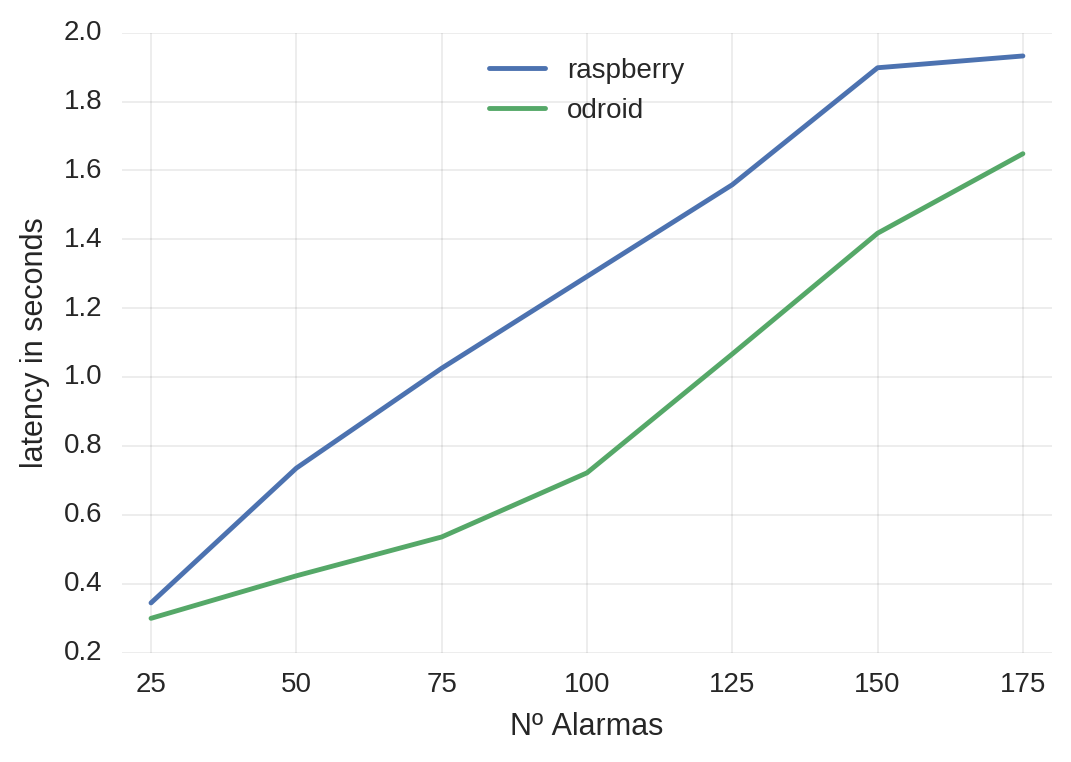

In [33]:
CastAndPlot2(lrasp,lodroid,"latency in seconds",
              "<",10,morder)

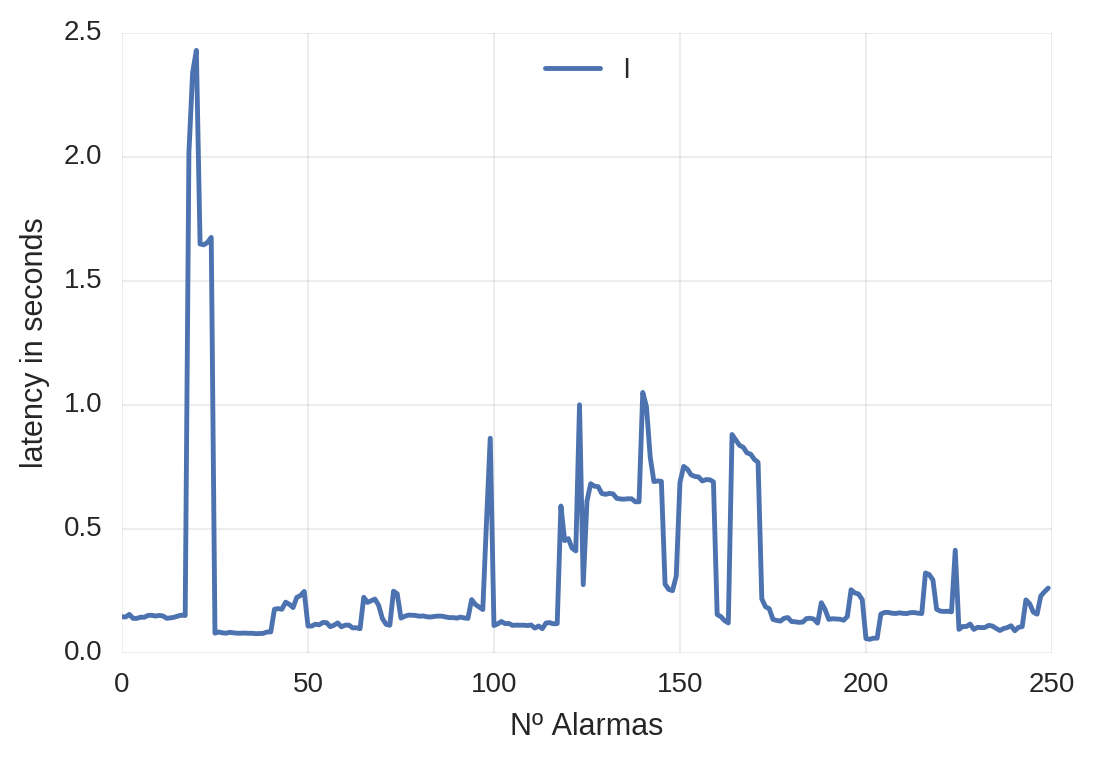

In [22]:
CastAndPlot1(lat25o,"latency in seconds")

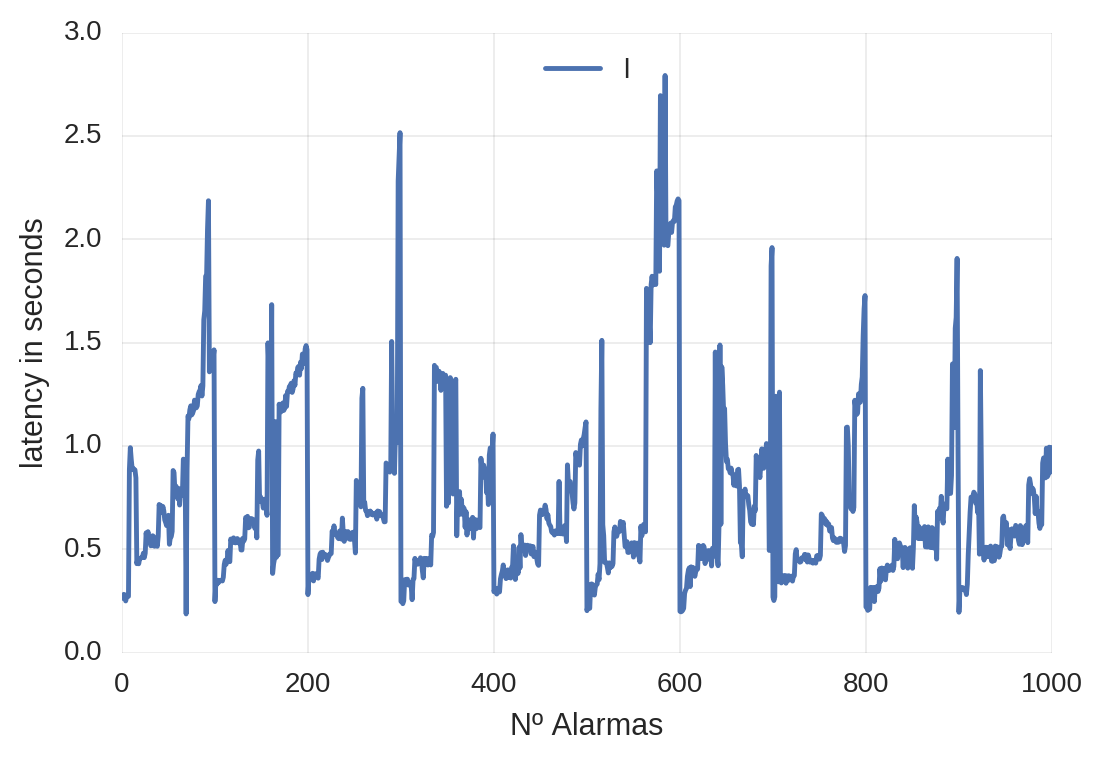

In [23]:
CastAndPlot1(lat100o,"latency in seconds")

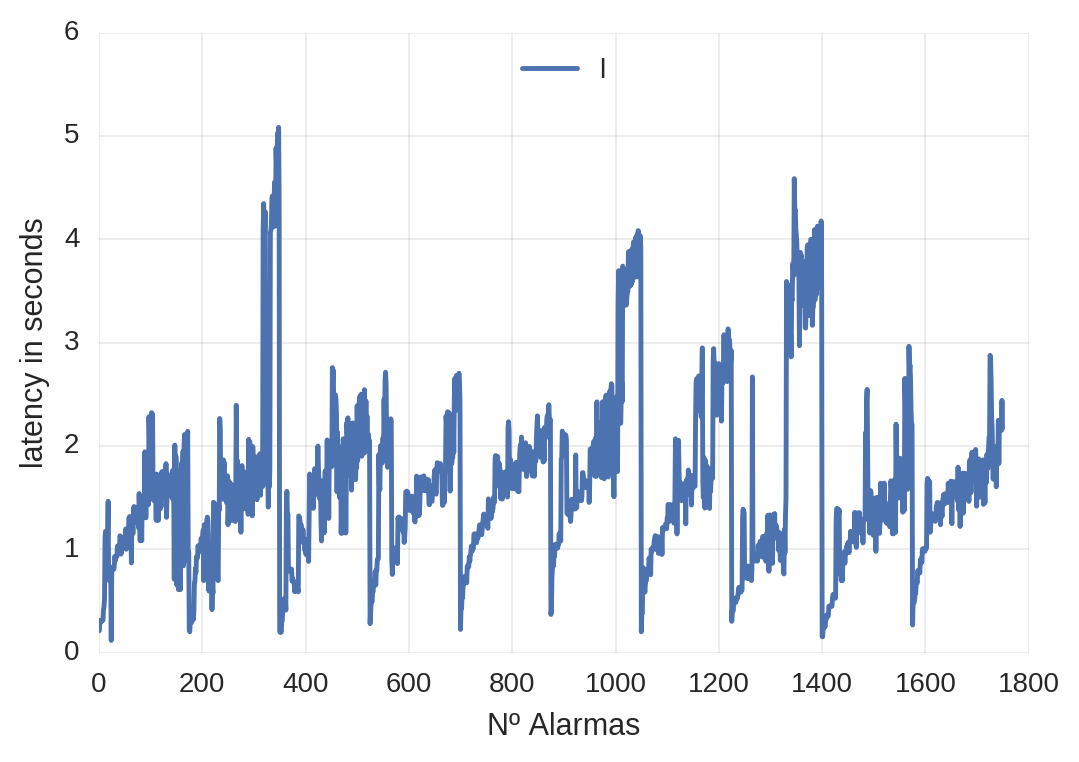

In [24]:
CastAndPlot1(lat175o,"latency in seconds")